# DataViz Project - Airplane Crashes Since 1908

## Exploratory Data Analysis

### 1. Reading the data



In [195]:
import pandas as pd

file_path = "dataset/clean_v1_Airplane_Crashes_and_Fatalities_Since_1908.csv"
dframe = pd.read_csv(file_path)

# get information about data entries by column:
dframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
Date          5268 non-null object
Time          3049 non-null object
Location      5248 non-null object
Latitude      5240 non-null float64
Longitude     5240 non-null float64
Operator      5250 non-null object
Type          5241 non-null object
Aboard        5246 non-null float64
Fatalities    5256 non-null float64
Ground        5246 non-null float64
Summary       4878 non-null object
dtypes: float64(5), object(6)
memory usage: 452.8+ KB


From the info() method we can see there are several missing values - difference from the total of 5268 entries

Date          5268 

Time          3049  *-> missing 2219 values*

Location      5248  *-> missing 20 values*

Latitude      5240  *-> missing 28 values (generated from Location, missing 8)*

Longitude     5240  *-> missing 28 values (generated from Location, missing 8)*

Operator      5250  *-> missing 18 values*

Type          5241  *-> missing 19 values*

Aboard        5246  *-> missing 22 values*

Fatalities    5256  *-> missing 12 values*

Ground        5246  *-> missing 22 values*

Summary       4878  *-> missing 390 values*



In [196]:
# get a brief statistical summary of the data
dframe.describe(include="object") #dtype object

,Date,Time,Location,Operator,Type,Summary
count,5268,3049,5248,5250,5241,4878
unique,4753,999,4304,2476,2445,4673
top,06/18/1972,15:00,"Moscow, Russia",Aeroflot,Douglas DC-3,Crashed during takeoff.
freq,4,32,15,179,334,15


In [197]:
dframe.describe() #default only numerical values

,Latitude,Longitude,Aboard,Fatalities,Ground
count,5240.000000,5240.000000,5246.000000,5256.000000,5246.000000
mean,27.010367,-16.061076,27.554518,20.068303,1.608845
std,24.570333,83.419121,43.076711,33.199952,53.987827
min,-77.529716,-176.669861,0.000000,0.000000,0.000000
25%,10.944428,-82.810095,5.000000,3.000000,0.000000
50%,34.392923,-9.149480,13.000000,9.000000,0.000000
75%,43.801488,37.615021,30.000000,23.000000,0.000000
max,80.449997,178.800476,644.000000,583.000000,2750.000000


Only numerical columns are described if we don't use the argument include="object". 
We can spot some possible errors in Aboard and Fatalities: the minimum shouldn't be zero for either of them, as this dataset is only about crashes with reported fatalities - we'll have to investigate this, as it could be due to missing values or a wrong value.

The fact that there are only 4673 unique summaries of the crash doesn't necessarily point to duplicate entries - it might just be the summary was the same kind of description, such as "Crashed on landing".


### 2. Cleaning and organizing the data

Correct types for columns:

In [198]:
dframe["Date"].head()

0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

In [199]:
pd.to_datetime(dframe["Date"], format="%m/%d/%Y", errors="coerce")

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
5      1915-03-05
6      1915-09-03
7      1916-07-28
8      1916-09-24
9      1916-10-01
10     1916-11-21
11     1916-11-28
12     1917-03-04
13     1917-03-30
14     1917-05-14
15     1917-06-14
16     1917-08-21
17     1917-10-20
18     1918-04-07
19     1918-05-10
20     1918-08-11
21     1918-12-16
22     1919-05-25
23     1919-07-19
24     1919-10-02
25     1919-10-14
26     1919-10-20
27     1919-10-30
28     1920-03-10
29     1920-03-30
          ...    
5238   2008-11-13
5239   2008-11-16
5240   2008-11-27
5241   2008-12-03
5242   2008-12-11
5243   2008-12-15
5244   2009-01-04
5245   2009-01-15
5246   2009-02-07
5247   2009-02-07
5248   2009-02-12
5249   2009-02-15
5250   2009-02-20
5251   2009-02-25
5252   2009-03-09
5253   2009-03-12
5254   2009-03-22
5255   2009-03-23
5256   2009-04-01
5257   2009-04-06
5258   2009-04-09
5259   2009-04-17
5260   2009-04-17
5261   2009-04-29
5262   200

In [200]:
dframe['Aboard'] = pd.to_numeric(dframe['Aboard'], downcast="integer", errors="coerce")
dframe['Aboard']
#dtype="Int64" could also work to cast these as integers and maintain rows with NaN, 
#meanwhile they are floats

0         2.0
1         5.0
2         1.0
3        20.0
4        30.0
5        41.0
6        19.0
7        20.0
8        22.0
9        19.0
10       28.0
11       20.0
12       20.0
13       23.0
14       21.0
15       24.0
16       18.0
17       18.0
18       23.0
19       22.0
20       19.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        NaN
27        1.0
28        1.0
29        1.0
        ...  
5238      7.0
5239      8.0
5240      7.0
5241      3.0
5242      3.0
5243     12.0
5244      9.0
5245    155.0
5246     28.0
5247      2.0
5248     49.0
5249     13.0
5250      5.0
5251    134.0
5252     11.0
5253     18.0
5254     14.0
5255      2.0
5256     16.0
5257     24.0
5258      6.0
5259     11.0
5260     11.0
5261      7.0
5262     18.0
5263    112.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: Aboard, Length: 5268, dtype: float64


Before proceeding with changes to other datatypes, we need to check for NaN values, etc.

> isna(obj)	    Detect missing values for an array-like object.
>
> isnull(obj)	Detect missing values for an array-like object.
>
> notna(obj)	Detect non-missing values for an array-like object.
>
> notnull(obj)	Detect non-missing values for an array-like object.

Aboard's mean value is 27.5, so we can use that as a temporary placeholder (or 28, for an integer)

In [201]:
import numpy as np

aboard_series = dframe['Aboard']
aboard_series.fillna("28", inplace=True)
aboard_series

#alternatively, replace([1.5, df00], [np.nan, 'a'])
# see http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#numeric-replacement

0         2
1         5
2         1
3        20
4        30
5        41
6        19
7        20
8        22
9        19
10       28
11       20
12       20
13       23
14       21
15       24
16       18
17       18
18       23
19       22
20       19
21        1
22        1
23        1
24        1
25        1
26       28
27        1
28        1
29        1
       ... 
5238      7
5239      8
5240      7
5241      3
5242      3
5243     12
5244      9
5245    155
5246     28
5247      2
5248     49
5249     13
5250      5
5251    134
5252     11
5253     18
5254     14
5255      2
5256     16
5257     24
5258      6
5259     11
5260     11
5261      7
5262     18
5263    112
5264      4
5265    228
5266      1
5267     13
Name: Aboard, Length: 5268, dtype: object

In [202]:
#are there NA values left? it will return a list with the values that satisfy the condition, 
#otherwise empty list
null_aboard = aboard_series[aboard_series.isnull()]
print("No null values in Aboard series.") if not null_aboard.any() else print(null_aboard)
dframe["Aboard"] = pd.to_numeric(aboard_series, errors="coerce", downcast="integer")
#check dataframe to see if all replacements were done.. aboard should now have 5268 ints
dframe.info()

No null values in Aboard series.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
Date          5268 non-null object
Time          3049 non-null object
Location      5248 non-null object
Latitude      5240 non-null float64
Longitude     5240 non-null float64
Operator      5250 non-null object
Type          5241 non-null object
Aboard        5268 non-null int16
Fatalities    5256 non-null float64
Ground        5246 non-null float64
Summary       4878 non-null object
dtypes: float64(4), int16(1), object(6)
memory usage: 421.9+ KB


['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


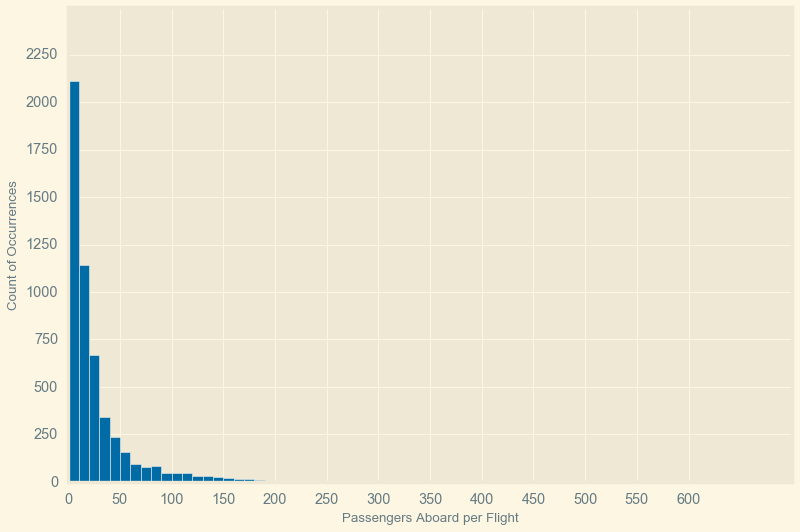

In [267]:
#quick plot - EDA
import matplotlib as mp
import matplotlib.pyplot as plt

#print(plt.style.available)
mp.style.use("tableau-colorblind10")

dframe["Aboard"].hist(bins = range(dframe["Aboard"].min(), dframe["Aboard"].max(), 10))
plt.ylabel("Count of Occurrences")
plt.xlabel("Passengers Aboard per Flight")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()



In [204]:
dframe["Aboard"].max()


644

Doing the same thing for fatalities and ground... Let's check which values are missing or NaN

Also, let's check for values lower than 1 in Aboard and Fatalities

In [226]:
#Nan and lower than x values (useful for checking zeros, for instance)

def check_nulls(column):
    column_series = dframe[column]
    null_column = column_series[(column_series.isna()) | (column_series.isnull())]
    print("No null values in {0} series.".format(column)) if null_column.empty else print(null_column)

def check_lower_than(column, value=1):
    column_series = dframe[column]
    filtered_column = column_series[(column_series < value)]
    print("No values lower than {1} in {0} series.".format(column, value)) if filtered_column.empty else print(filtered_column)


#TODO: create a neat function for this
print([(print("\n--- {}".format(column.upper())), check_nulls(column), check_lower_than(column, 1)) for column in ["Aboard", "Fatalities", "Ground"]])   



--- ABOARD
No null values in Aboard series.
3307    0
3611    0
Name: Aboard, dtype: int16

--- FATALITIES
26     NaN
333    NaN
364    NaN
423    NaN
537    NaN
570    NaN
571    NaN
573    NaN
593    NaN
678    NaN
768    NaN
4705   NaN
Name: Fatalities, dtype: float64
108     0.0
387     0.0
889     0.0
897     0.0
1265    0.0
1359    0.0
1440    0.0
1443    0.0
1610    0.0
1837    0.0
1868    0.0
1885    0.0
1927    0.0
1982    0.0
1983    0.0
2066    0.0
2247    0.0
2266    0.0
2359    0.0
2486    0.0
2590    0.0
2835    0.0
3182    0.0
3307    0.0
3341    0.0
3366    0.0
3417    0.0
3428    0.0
3470    0.0
3541    0.0
3549    0.0
3611    0.0
3767    0.0
3927    0.0
3950    0.0
4068    0.0
4117    0.0
4171    0.0
4199    0.0
4231    0.0
4242    0.0
4273    0.0
4339    0.0
4543    0.0
4553    0.0
4594    0.0
4701    0.0
4748    0.0
4797    0.0
4875    0.0
5057    0.0
5074    0.0
5134    0.0
5178    0.0
5186    0.0
5197    0.0
5217    0.0
5245    0.0
Name: Fatalities, dtype: float6

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
5057,08/02/2005,16:04,"Toronto, Canada",43.648689,-79.385437,Air France,Airbus A-340,309,0.0,0.0,The plane landed almost half-way down Runway 2...


From the above report we can see the rows we need to fix (NaN), and possibly investigate to check if the values are correct (zeros). A 0 on the Ground column is not "supicious", as that column indicates fatalities *on impact*, but a 0 value on the Aboard column certainly raises some flags - was it an unmanned flight?

When we fill in all these values, we can downcast them to integers - there should be no "half" of a person accounted. Right now they are floats as it is pandas way to deal with NaN values.

Starting with the two rows of the Aboard series that show 0s...

>--- ABOARD
>
>No null values in Aboard series.
>
>
>*3307*    0
>
>*3611*   0
>
>Name: Aboard, dtype: int16

In [227]:
dframe[3307:3308] #slicing selects rows instead of columns

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
3307,09/22/1981,12:00,"Near Babaeski, Turkey",41.428761,27.09429,Military - Turkish Air Force,Northrop F-5A,0,0.0,40.0,The fighter crashed into a village after the p...


For this record, we find the following information:

> A Turkish Air Force F-5A crashedon to an army camp at Pancarkoy, 276 n.m. north-west of Ankara, during a mock attack on September 22. 
>
> The pilot and 39 soldiers were killed, while 72 soldiers were severely injured. 
[Source](https://www.flightglobal.com/FlightPDFArchive/1981/1981%20-%203134.PDF)

and a news article the day after the crash:

>Hospital sources said more than 100 soldiers, including dead and injured, had been flown to Istanbul by helicopter from the crash site, near Babaeski, about 30 miles from the Greek border and 70 miles northwest of Istanbul.

>The Turkish military imposed a news blackout after initial reports that the jet was an F-104 and that at least 100 soldiers had been killed. Turkey's military ruler, Gen. Kenan Evren, announced over the state radio later that an F-5 had crashed and that there were ''several casualties.''

>The sources said the pilot was practicing a diving run over the bivouac area and was unable to pull the plane out of its descent. They said that he was killed in the crash, which occurred about noon, and that there were reports the jet hit a gasoline or jet fuel dump.

[NYTimes](https://www.nytimes.com/1981/09/23/world/26-killed-as-turkish-jet-crashes-into-area-set-for-nato-exercise.html)

So let's amend the row to read Aboard/Fatalities/Ground as 1/1/40. The summary also appears to be incorrect regarding this accident.

In [272]:
dframe.loc[3307, "Aboard"] = 1
dframe.loc[3307, "Fatalities"] = 1
dframe.loc[3307, "Summary"] = "A Turkish Air Force F-5A crashed on to an army camp at Pancarkoy, 276 n.m. north-west of Ankara, during a mock attack on September 22. The pilot and 39 soldiers were killed, while 72 soldiers were severely injured."

dframe.loc[3307, :]

Date                                                 09/22/1981
Time                                                      12:00
Location                                  Near Babaeski, Turkey
Latitude                                                41.4288
Longitude                                               27.0943
Operator                           Military - Turkish Air Force
Type                                              Northrop F-5A
Aboard                                                        1
Fatalities                                                    1
Ground                                                       40
Summary       A Turkish Air Force F-5A crashed on to an army...
Name: 3307, dtype: object

In [228]:
dframe[3611:3612]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
3611,03/27/1986,NaN,"Bangui, Central African Republic",4.39669,18.558599,Military - French Air Force,Sepecat Jaguar A,0,0.0,35.0,The jet fighter crashed into a school shortly ...


Some info on this crash:

> Time:	08:00

> Fatalities:	Fatalities: 0 / Occupants: 1

> Other fatalities:	21

> Aircraft damage:	Written off (damaged beyond repair)

> Narrative: Crashed into a school shortly after taking off from Bangui Central African Republic, after experiencing engine failure. Pilot (Lt. M. Etcheberry) ejected safely, but the crippled Jaguar killed at least 21 people on the ground (some reports say "up to 35") when it came down on a school on the outskirts of the city.

[Source](https://aviation-safety.net/wikibase/wiki.php?id=64984)

So we can add Time and Aboard as 08:00/1.

In [273]:
dframe.loc[3611, "Aboard"] = 1
dframe.loc[3611, "Time"] = "08:00"

dframe.loc[3611, :]

Date                                                 03/27/1986
Time                                                      08:00
Location                       Bangui, Central African Republic
Latitude                                                4.39669
Longitude                                               18.5586
Operator                            Military - French Air Force
Type                                           Sepecat Jaguar A
Aboard                                                        1
Fatalities                                                    0
Ground                                                       35
Summary       The jet fighter crashed into a school shortly ...
Name: 3611, dtype: object

In [278]:
check_nulls("Aboard")
check_lower_than("Aboard", 1)


No null values in Aboard series.
No values lower than 1 in Aboard series.


Moving on to check Fatalities, we should keep in mind that this column details the number of people that died *aboard* - crew and passengers.

As we saw in the entry above (row 3611), detailing the accident in Bangui, the pilot was the sole person aboard and escaped alive, and all the fatalities were on impact. So Fatalities can be less than Ground but not more than Aboard. For now let's check the NaN values.


In [279]:
check_nulls("Fatalities")

26     NaN
333    NaN
364    NaN
423    NaN
537    NaN
570    NaN
571    NaN
573    NaN
593    NaN
678    NaN
768    NaN
4705   NaN
Name: Fatalities, dtype: float64


In [280]:
dframe[26:27]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
26,10/20/1919,NaN,English Channel,49.035534,-5.337111,Aircraft Transport and Travel,De Havilland DH-4,28,NaN,NaN,NaN


[Source 1](https://aviation-safety.net/wikibase/wiki.php?id=27974)

> Time:	day

> Fatalities: 0 / Occupants: 1

> Other fatalities:	0

[Source 2](https://www.baaa-acro.com/crash/crash-de-havilland-dh4a-folkestone)

> Crew on board: 1    Crew fatalities:  0

> Pax on board: 0     Pax fatalities:  0

> Other fatalities: 0 Total fatalities:  0

> Circumstances:  The pilot, Major-General Edward James Montagu-Stuart-Wortley, was returning to Croydon following an exhibition in Interlaken, Switzerland. After a fuel stop in Paris-Le Bourget, he continued his flight to the base in Croydon. While overflying The Channel and approaching the British coast, pilot encountered fog and the visibility was low. Eventually, aircraft crashed into the sea off Folkestone, Kent. The pilot was rescued while the aircraft was lost.

Aboard is 28 because we replaced it by the mean value before, but we can now fix all this missing information. Because the time is uncertain, but it's marked as "day", let's default to 12:00

In [281]:
dframe.loc[26, "Time"] = "12:00"
dframe.loc[26, "Aboard"] = 1
dframe.loc[26, "Fatalities"] = 0
dframe.loc[26, "Ground"] = 0
dframe.loc[26, "Summary"] = "The pilot, Major-General Edward James Montagu-Stuart-Wortley, was returning to Croydon following an exhibition in Interlaken, Switzerland. After a fuel stop in Paris-Le Bourget, he continued his flight to the base in Croydon. While overflying The Channel and approaching the British coast, pilot encountered fog and the visibility was low. Eventually, aircraft crashed into the sea off Folkestone, Kent. The pilot was rescued while the aircraft was lost."

dframe.loc[26, :]

Date                                                 10/20/1919
Time                                                      12:00
Location                                        English Channel
Latitude                                                49.0355
Longitude                                              -5.33711
Operator                          Aircraft Transport and Travel
Type                                          De Havilland DH-4
Aboard                                                        1
Fatalities                                                    0
Ground                                                        0
Summary       The pilot, Major-General Edward James Montagu-...
Name: 26, dtype: object

In [282]:
dframe[333:334]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
333,08/10/1934,NaN,"Ningbo, China",29.873859,121.55027,China National Aviation Corporation,Sikorsky S-38B,28,NaN,NaN,NaN


[Source](https://www.baaa-acro.com/crash/crash-sikorsky-s-38-ningbo-1-killed)

> Date & Time:  Aug 10, 1934

> Crew fatalities:  1

> Total fatalities:  1

> Circumstances:  Crashed in unknown circumstances in the Bay of Ningbo. At least one crew member was killed.

In [283]:
dframe.loc[333, "Aboard"] = 1
dframe.loc[333, "Fatalities"] = 1
dframe.loc[333, "Ground"] = 0
dframe.loc[333, "Summary"] = "Crashed in unknown circumstances in the Bay of Ningbo. At least one crew member was killed."
dframe.loc[333, :]

Date                                                 08/10/1934
Time                                                        NaN
Location                                          Ningbo, China
Latitude                                                29.8739
Longitude                                                121.55
Operator                    China National Aviation Corporation
Type                                             Sikorsky S-38B
Aboard                                                        1
Fatalities                                                    1
Ground                                                        0
Summary       Crashed in unknown circumstances in the Bay of...
Name: 333, dtype: object

In [284]:
dframe[364:365]
#couldn't find info on this entry
#TODO: drop it?

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
364,08/13/1935,NaN,"Hangow, China",36.563114,103.735809,China National Aviation Corporation,Sikorsky S-38B,28,NaN,NaN,Destoryed in a storm.


In [285]:
dframe[423:424]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
423,12/26/1936,NaN,"Nanking, China",32.05838,118.796471,China National Aviation Corporation,Douglas DC-2,28,NaN,NaN,NaN


Not a lot of information on this flight found, but it seems like a rather minor incident:
    
[Source](https://aviation-safety.net/database/record.php?id=19361228-1)
> Emergency landed on a river sandbar near Nanking after engine trouble. Pilot Hiram Broiles injured. Aircraft recovered and flown again. Ex Pan Am NC14297

*Consider dropping this entry as well?*

In [286]:
#TODO:drop?
dframe.loc[423, "Summary"] = "Emergency landed on a river sandbar near Nanking after engine trouble. Pilot Hiram Broiles injured. Aircraft recovered and flown again. "
dframe.loc[423, :]

Date                                                 12/26/1936
Time                                                        NaN
Location                                         Nanking, China
Latitude                                                32.0584
Longitude                                               118.796
Operator                    China National Aviation Corporation
Type                                               Douglas DC-2
Aboard                                                       28
Fatalities                                                  NaN
Ground                                                      NaN
Summary       Emergency landed on a river sandbar near Nanki...
Name: 423, dtype: object

In [287]:
dframe[527:528]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
527,11/20/1939,NaN,"Gosport, England",50.794418,-1.12174,British Airways,Airspeed Oxford,2,2.0,NaN,NaN


[Source](https://aviation-safety.net/wikibase/wiki.php?id=24958)

>Time:	day

>Fatalities:	Fatalities: 2 / Occupants: 2
/ Other fatalities:	0

>Written off (destroyed) when crashed after struck barrage balloon near Marchan, Gosport, Hampshire 20.11.39. 
 
>The pilot and the radio operator were killed when a civil aeroplane crashed near Gosport, Hants, yesterday after hitting a cable. The pilot, Arthur George Nicholson was 23. Before the war he flew on the Heston to Warsaw route for British Airways. He was a native of Aylesbury, Bucks., and was married. The radio operator, Arthur Edward Eady, a Londoner, was 27. He too, was a married man and before the war was with British Airways, serving on the Scandinavian and Brussels routes.

In [288]:
dframe.loc[527, "Time"] = "12:00"
dframe.loc[527, "Ground"] = 0
dframe.loc[527, "Summary"] = "Written off (destroyed) when crashed after struck barrage balloon near Marchan, Gosport, Hampshire 20.11.39. The pilot and the radio operator were killed when a civil aeroplane crashed near Gosport, Hants, yesterday after hitting a cable."
dframe.loc[527, :]

Date                                                 11/20/1939
Time                                                      12:00
Location                                       Gosport, England
Latitude                                                50.7944
Longitude                                              -1.12174
Operator                                        British Airways
Type                                            Airspeed Oxford
Aboard                                                        2
Fatalities                                                    2
Ground                                                        0
Summary       Written off (destroyed) when crashed after str...
Name: 527, dtype: object

In [290]:
dframe[537:538]

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
537,07/07/1940,NaN,Gulf of Tonkin,19.837351,107.775848,Air France,Dewoitine D-338,28,NaN,NaN,Shot down by a Japanese military fighter.


[Source](https://aviation-safety.net/database/record.php?id=19400707-0)

>Crew:	Fatalities: 4 / Occupants: 4

>Passengers:	Fatalities: 0 / Occupants: 0

>Total:	Fatalities: 4 / Occupants: 4

[Source 2]()

>Take-off at 0835 with two French officers and a Major of the IJN as passengers.

>Supposed to have been shot down by Japanese fighters.

>The wreck was located at 109°30 E and 21° N. Fishermen from Hong Kong retrieved the corpses 6 km off the coast.

>On 10th July, the Japanese apologized to the Gouverneur Général for this "mistake", thus confirming that the D.338 was actually shot down by their fighters.

From this we can confirm that we have approximately the right coordinates from the data scrapping, and it gives us a time window - for practical purposes, let's round it to 9am, we could be more precise if we went to the trouble of checking how long it would take this aircraft to cover the distance from departure at Hanoi to where it crashed.


In [291]:
dframe.loc[537, "Time"] = "09:00"
dframe.loc[537, "Aboard"] = 4
dframe.loc[537, "Fatalities"] = 4
dframe.loc[537, "Ground"] = 0
dframe.loc[537, :]

Date                                         07/07/1940
Time                                              09:00
Location                                 Gulf of Tonkin
Latitude                                        19.8374
Longitude                                       107.776
Operator                                     Air France
Type                                    Dewoitine D-338
Aboard                                                4
Fatalities                                            4
Ground                                                0
Summary       Shot down by a Japanese military fighter.
Name: 537, dtype: object

In [293]:
check_nulls("Fatalities")
dframe[570:574]

364    NaN
423    NaN
570    NaN
571    NaN
573    NaN
593    NaN
678    NaN
768    NaN
4705   NaN
Name: Fatalities, dtype: float64


,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
570,01/24/1942,NaN,"Near Samarinda, Borneo",-0.502183,117.153763,KNILM,Douglas DC-3,28,NaN,NaN,Shot down by Japanese military aircraft.
571,01/26/1942,NaN,"Kupang, Timor",-10.172443,123.577942,KNILM,Grumman G-21 Goose,28,NaN,NaN,Shot down by Japanese military aircraft.
572,01/30/1942,NaN,"Near Kupang, Timor",-10.172443,123.577942,Qantas,Short S-23 (flying boat),18,13.0,0.0,Shot down by Japanese military aircraft. Owned...
573,02/14/1942,NaN,NaN,NaN,NaN,China National Aviation Corporation,Douglas DC-2,28,NaN,NaN,NaN
